# 逻辑回归

- 虽然叫回归，但解决的问题是分类问题
- 但给出的结论是一个概率（0-1之间的值）

## 符号约定

$ \boldsymbol{x}_i = \left[ \begin{matrix} x_{i0} & x_{i1} & \cdots & x_{in} \end{matrix} \right]^{\text{T}} $ 表示第i个样本的特征值，显然我们有n个特征，$x_{i0}$ 表示截距

$y_i$ 表示第i个样本的标签

$m$ 是样本数量 

$\boldsymbol{\theta} = \left[ \begin{matrix} \theta_0 & \theta_1 & \cdots & \theta_n \end{matrix} \right]^{\text{T}}$ 表示模型参数，是我们要求解的对象

$ h_\boldsymbol{\theta}(\boldsymbol{x}) $ 表示我们的模型对样本的估计， $ h_\boldsymbol{\theta}(\boldsymbol{x}_i) $ 表示我们的模型对第i个样本的估计

$:=$ 表示赋值

## sigmoid函数

考虑二分类问题，我们希望得到的估计值应该是0或者1，线性回归 $h_{\boldsymbol{\theta}}(\boldsymbol{x}) = \boldsymbol{\theta}^{\text{T}}\boldsymbol{x} $ 显然不再合适（参考机器学习之线性回归）。

为了解决分类问题，将回归函数表示成如下形式

$$ h_{\boldsymbol{\theta}}(x) = g(\boldsymbol{\theta}^{\text{T}}\boldsymbol{x}) = \frac{1}{1 + e^{-\boldsymbol{\theta}^{\text{T}}\boldsymbol{x}}}  \tag{1}$$

其中
$$ g(z) = \frac{1}{1+e^{-z}} $$

被称作sigmoid函数或者logistic函数。它的函数曲线如下图。

<img src="./sigmoid.png" />

> **关于logistic函数**
>
> logistic函数也称为对数几率函数。
>
> $$ \begin{align*} &g(z) = \frac{1}{1+e^{-z}} \\ \Rightarrow\quad & 1+e^{-z} = \frac{1}{g(z)} \\ \Rightarrow\quad & e^{-z} = \frac{1-g(z)}{g(z)} \\ \Rightarrow\quad & z = \ln \frac{g(z)}{1-g(z)} \end{align*}$$
>
> 若将 $g(z)$ 视为样本是正例的可能性，则 $1-g(z)$ 是其反例的可能性。$\frac{g(z)}{1-g(z)}$ 称为“几率”（odds），反映了样本作为正例的相对可能性，$\ln \frac{g(z)}{1-g(z)}$ 称为“对数几率”（log odds，亦称logit）。
>
> 所以式(1)也可理解为用线性回归模型的预测结果去逼近真实标记的对数几率。

## 参数求解

我们从损失函数和最大似然估计两个角度来理解参数求解的过程。

### 损失函数

依旧使用线性回归的损失函数 $J(\theta)=\frac{1}{2m}\sum_{i=1}^{m} \left( h_\theta(x_{i})-y_{i} \right)^2$ 的话，$J(\theta)$ 将是一个非凸的，无法利用梯度下降方法来最小化损失函数。

<img src="./non-convex.png" />

所以，我们重新定义一个损失：

$$Cost\left( h_\boldsymbol{\theta}(\boldsymbol{x}), y \right) = \left\{ \begin{align*} - \log \left( h_\boldsymbol{\theta}(\boldsymbol{x}) \right), \quad y=1 \\ 
- \log \left( 1-h_\boldsymbol{\theta}(\boldsymbol{x}) \right),\quad y=0
\end{align*}\right.$$

当样本为正例（$y=1$）时，如果我们判断为负例，则 $h_\boldsymbol{\theta}(\boldsymbol{x})$ 接近于0而远离1（如0.1），此时损失会很大；如果我们判断为正例，则 $h_\boldsymbol{\theta}(\boldsymbol{x})$ 接近于1而远离0（如0.9），此时损失会很小。

当样本为负例（$y=0$）时，如果我们判断为正例，则 $h_\boldsymbol{\theta}(\boldsymbol{x})$ 接近于1而远离0（如0.9），此时损失会很大；如果我们判断为负例，则 $h_\boldsymbol{\theta}(\boldsymbol{x})$ 接近于0而远离1（如0.1），此时损失会很小。

所以上面的损失能够较好的评价回归模型的好坏。

基于上面的定义，定义逻辑回归的损失函数：

$$ \begin{align*}J(\boldsymbol{\theta})&=\frac{1}{m} \sum_{i=1}^{m} Cost(h_\theta(x_{i}), y_{i}) \\
&=-\frac{1}{m}\left[\sum_{i=1}^{m}y_{i} \log h_\theta(x_{i})+(1-y_{i}) \log (1-h_\theta(x_{i}))\right]
\end{align*} $$

利用梯度下降来最小化损失函数，从而求解 $\boldsymbol{\theta}$：

$$ \begin{align*}
\theta_j &:= \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\boldsymbol{\theta}) \\
&:= \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( h_\boldsymbol{\theta}(\boldsymbol{x_i}) - y_i \right) x_{ij}
\end{align*}$$

其中，关于 $J(\boldsymbol{\theta})$ 的求导：

$$\begin{align*}
\frac{\partial}{\partial \theta_j} J(\boldsymbol{\theta}) &= \frac{\partial}{\partial \theta_j} \left\{-\frac{1}{m} \left[ \sum_{i=1}^{m} y_i \log h_\boldsymbol{\theta}(\boldsymbol{x}_i) + (1-y_i) \log \left( 1-h_\boldsymbol{\theta}(\boldsymbol{x}_i) \right) \right] \right\} \\
&= -\frac{1}{m} \sum_{i=1}^{m} \left( y_i \frac{1}{h_\boldsymbol{\theta}(\boldsymbol{x}_i)} + (1-y_i)\frac{1}{1-h_\boldsymbol{\theta}(\boldsymbol{x}_i)} (-1) \right) \frac{\partial}{\partial \theta_j} h_\boldsymbol{\theta}(\boldsymbol{x}_i) \\
&= -\frac{1}{m} \sum_{i=1}^{m} \left( y_i \frac{1}{h_\boldsymbol{\theta}(\boldsymbol{x}_i)} - (1-y_i)\frac{1}{1-h_\boldsymbol{\theta}(\boldsymbol{x}_i)} \right) \frac{\partial}{\partial \theta_j} \frac{1}{1+e^{\boldsymbol{\theta}^{\text{T}}\boldsymbol{x}_i}} \\
&= -\frac{1}{m} \sum_{i=1}^{m} \left( y_i \frac{1}{h_\boldsymbol{\theta}(\boldsymbol{x}_i)} - (1-y_i)\frac{1}{1-h_\boldsymbol{\theta}(\boldsymbol{x}_i)} \right) (-1) \frac{1}{\left( 1 + e^{-\boldsymbol{\theta}^{\text{T}} \boldsymbol{x}_i} \right)^2} \exp \left({-\boldsymbol{\theta}^{\text{T}} \boldsymbol{x}_i} \right) (-1) x_{ij} \\
&= -\frac{1}{m} \sum_{i=1}^{m} \left( y_i \frac{1}{h_\boldsymbol{\theta}(\boldsymbol{x}_i)} - (1-y_i)\frac{1}{1-h_\boldsymbol{\theta}(\boldsymbol{x}_i)} \right) \frac{1}{1+e^{\boldsymbol{\theta}^{\text{T}} \boldsymbol{x}_i}} \left( 1-\frac{1}{1+e^{\boldsymbol{\theta}^{\text{T}} \boldsymbol{x}_i}} \right) x_{ij} \\
&= -\frac{1}{m} \sum_{i=1}^{m} \left( y_i \frac{1}{h_\boldsymbol{\theta}(\boldsymbol{x}_i)} - (1-y_i)\frac{1}{1-h_\boldsymbol{\theta}(\boldsymbol{x}_i)} \right) h_\boldsymbol{\theta}(\boldsymbol{x}_i) \left( 1 - h_\boldsymbol{\theta}(\boldsymbol{x}_i) \right) x_{ij} \\
&= \frac{1}{m} \sum_{i=1}^{m} \left( h_\boldsymbol{\theta}(\boldsymbol{x}_i) - y_i \right) x_{ij}
\end{align*}$$

考虑正则化项的损失函数（这里是L2正则化项）：

$$ \begin{align*}J(\theta) = -\frac{1}{m}\left[\sum_{i=1}^{m}y_{i} \log h_\theta(x_{i}) + (1-y_{i}) \log (1-h_\theta(x_{i}))\right]+ \frac{\lambda}{m}\sum_{j=1}^{n}\theta_j^2
\end{align*} $$

### 最大似然估计

有如下概率表示：

$$ \begin{align*}
P\left(y=1\ |\ \boldsymbol{x};\boldsymbol{\theta}\right) &= h_\boldsymbol{\theta}(\boldsymbol{x}) \\
P\left(y=0\ |\ \boldsymbol{x};\boldsymbol{\theta}\right) &= 1 - h_\boldsymbol{\theta}(\boldsymbol{x})
\end{align*}$$

更简洁地表述为

$$p\left(y\ |\ \boldsymbol{x}; \boldsymbol{\theta}\right) = \left( h_\boldsymbol{\theta}(\boldsymbol{x}) \right) ^{y}\left( 1 - h_\boldsymbol{\theta}(\boldsymbol{x}) \right)^{1-y} $$

对m个样本，有似然函数

$$ \begin{align*}
L(\boldsymbol{\theta}) &= \prod_{i=1}^{m} p\left(y_i\ |\ \boldsymbol{x}_i;\boldsymbol{\theta}\right) \\
&= \prod_{i=1}^{m} \left( h_\boldsymbol{\theta}(\boldsymbol{x}_i) \right) ^{y_i}\left( 1 - h_\boldsymbol{\theta}(\boldsymbol{x}_i) \right)^{1-y_i}
\end{align*}$$

进而有对数似然

$$ \begin{align*}
l(\boldsymbol{\theta}) &= \log L(\boldsymbol{\theta}) \\
&= \sum_{i=1}^{m}y_i\log h_\boldsymbol{\theta}(\boldsymbol{x}_i) + (1-y_i)\log \left( 1-h_\boldsymbol{\theta}(\boldsymbol{x}_i) \right)
\end{align*}$$

我们的目的就是找出对数似然取极值（极大值）时的 $\boldsymbol{\theta}$ 取值。显然上式与损失函数的形式是一致的。

### 损失函数求解

问题就转成了求损失函数求最小值，求解的具体方法可以参考具体的手册：

- 求导（Normal Equation）
- 梯度下降（Gradient Descent）
- 牛顿法（Newton Method）

## 实践

以斯坦福的Deep Learning公开课的习题为例，对逻辑回归进行了编码（Python）。

数据来自于斯坦福Deep Learning公开课的习题[Exercise: Logistic Regression and Newton's Method](http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=DeepLearning&doc=exercises/ex4/ex4.html)，数据记录了两门课的考试成绩与最终是否被录取的关系。

读取数据、显示数据的代码如下。注意，最终有两份样本数据，一份是原始数据，一份是归一化以后的数据，因为梯度下降需要对输入进行归一化处理。两份数据中都会加上 $x_0 = 1$。

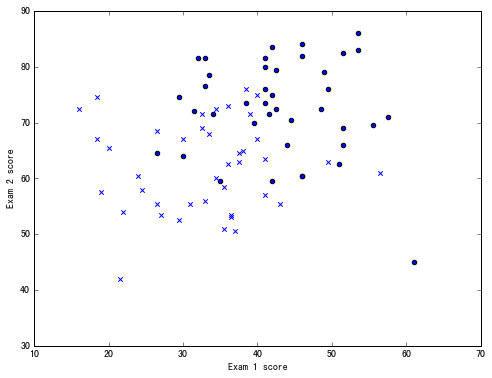

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline

# 读取数据
x_arr = np.loadtxt('input/college-admit/x.dat')
y_arr = np.loadtxt('input/college-admit/y.dat')

# 标准化处理（利用梯度下降时需要标准化处理数据）
x_mean = np.mean(x_arr, 0)
x_std = np.std(x_arr, 0)
x_arr_scale = (x_arr - x_mean) / x_std
# 组装截距
x_arr_scale = np.append(np.ones((len(x_arr_scale), 1)), x_arr_scale, 1)
x_arr = np.append(np.ones((len(x_arr), 1)), x_arr, 1)

# 绘制数据
plt.figure(1, figsize=(8, 6))
for k in range(len(x_arr)):
    if y_arr[k] > 0:
        plt.scatter(x_arr[k][1], x_arr[k][2])
    else:
        plt.scatter(x_arr[k][1], x_arr[k][2], marker='x')
plt.xlabel('Exam 1 score', fontsize='medium'); plt.ylabel('Exam 2 score', fontsize='medium')
plt.show()

利用梯度下降求解参数的代码如下。注意，这里对比了不同学习率的情况，最终的参数是在学习率为12的时候迭代20次后得到的。

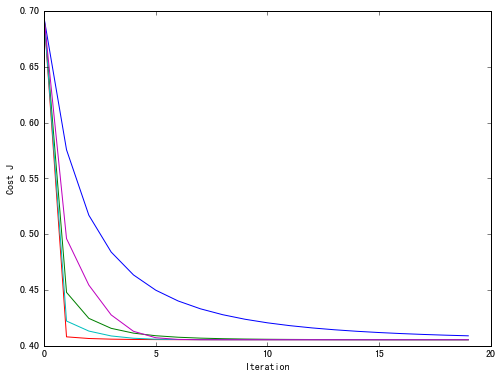

In [4]:
def sigmoid(z):
    """ sigmoid函数
    
    :param z: 
    :return: 
    """
    return 1.0 / (1.0 + np.exp(-1.0 * z))

def gradient_descent(_x_arr, _y_arr, _thetas, _alpha=12):
    """ 梯度下降函数
    
    :param _x_arr: 各样本的特征值。ndarray类型 
    :param _y_arr: 各样本的标签。ndarray类型 
    :param _thetas: 模型参数。ndarray类型 
    :param _alpha: 学习率
    :return: 更新后的模型参数
    """
    _thetas_new = _thetas.copy()
    for j in range(_x_arr.shape[1]):
        sum_err = 0.0
        for i in range(_x_arr.shape[0]):
            sum_err += (sigmoid((np.matrix(_thetas) * np.matrix(_x_arr[i]).T).item(0, 0)) - _y_arr[i]) * _x_arr[i,j]
        _thetas_new[j] = _thetas[j] - _alpha * sum_err / _x_arr.shape[0]
    return _thetas_new

plt.figure(1, figsize=(8, 6))

# 对比不同学习率的收敛速度。最后是一次学习率为12，迭代了12次，已经收敛
for alpha in [1, 3, 5, 8, 12]:
    thetas_gd = np.array([0.0, 0.0, 0.0])  # 初始参数
    err_gd_list = [0.0] * 20  # 统计误差
    for j in range(20):
        err_gd = 0
        for i in range(x_arr.shape[0]):
            err_gd += np.log(sigmoid((np.matrix(thetas_gd) * np.matrix(x_arr_scale[i]).T).item(0, 0))) * y_arr[i] +\
                      np.log(1 - sigmoid((np.matrix(thetas_gd) * np.matrix(x_arr_scale[i]).T).item(0, 0))) * (1 - y_arr[i])
        err_gd = -err_gd / x_arr.shape[0]
        err_gd_list[j] = err_gd
    
        # 梯度下降迭代求解参数
        thetas_gd = gradient_descent(x_arr_scale, y_arr, thetas_gd, alpha)
        
    # 绘制当前学习率下，每次迭代后的收敛情况
    plt.plot(range(20), err_gd_list, label=alpha)
    
plt.xlabel('Iteration', fontsize='medium'); plt.ylabel('Cost J', fontsize='medium')
plt.show()

利用牛顿法求解参数的代码如下。这里迭代次数为10次。

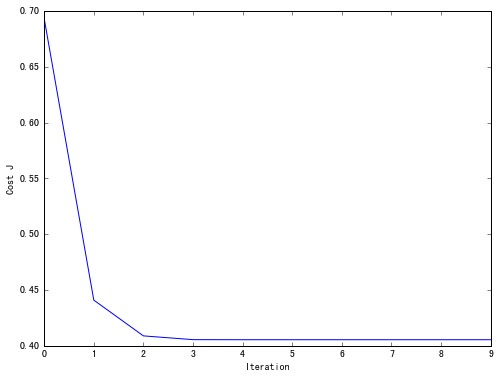

In [5]:
def newton(_x_arr, _y_arr, _thetas):
    """ 牛顿法

    :param _x_arr: 各样本的特征值。ndarray类型
    :param _y_arr: 各样本的标签。ndarray类型
    :param _thetas: 模型参数。ndarray类型
    :return: 更新后的模型参数
    """
    sum_gd = np.matrix([0.0, 0.0, 0.0]).T
    sum_hs = np.matrix(np.zeros((_x_arr.shape[1], _x_arr.shape[1])))
    for i in range(_x_arr.shape[0]):
        _x_i_mat = np.matrix(_x_arr[i]).T
        g = sigmoid((np.matrix(_thetas) * _x_i_mat).item(0, 0))
        sum_gd += (g - _y_arr[i]) * _x_i_mat
        sum_hs += (g * (1 - g)) * _x_i_mat * _x_i_mat.T
        
    gd = sum_gd / _x_arr.shape[0]  # 梯度
    hs = sum_hs / _x_arr.shape[0]  # hession矩阵
    
    _thetas -= np.array(hs.I * gd).ravel()
    
    return _thetas

plt.figure(1, figsize=(8, 6))

thetas_nt = np.array([0.0, 0.0, 0.0])  # 初始参数
err_nt_list = [0.0] * 10  # 统计误差
for j in range(10):
    err_nt = 0
    for i in range(x_arr.shape[0]):
        err_nt += np.log(sigmoid((np.matrix(thetas_nt) * np.matrix(x_arr[i]).T).item(0, 0))) * y_arr[i] +\
        np.log(1 - sigmoid((np.matrix(thetas_nt) * np.matrix(x_arr[i]).T).item(0, 0))) * (1 - y_arr[i])
    err_nt = -err_nt / x_arr.shape[0]
    err_nt_list[j] = err_nt

    # 牛顿法迭代求解参数
    thetas_nt = newton(x_arr, y_arr, thetas_nt.copy())

# 绘制每次迭代后的收敛情况，可以发现牛顿法比梯度下降法收敛的快
plt.plot(range(10), err_nt_list, label=alpha)  
plt.xlabel('Iteration', fontsize='medium'); plt.ylabel('Cost J', fontsize='medium')
plt.show()

可以发现牛顿法比梯度下降法收敛的更快。

下面的代码打印了通过梯度下降算法、牛顿法得到的参数，然后对考试1、考试2成绩分别为20、80的测试用例进行了预测，其不被录取的概率为0.668。代码最后绘制了分割线。

thetas of gradient descnet: [-0.056595    1.46279349  1.56073685]
thetas of newton`s method:  [-16.37874341   0.14834077   0.15890845]
test result of gradient descent: 0.668021864744
test result of newton`s method:  0.668021864022


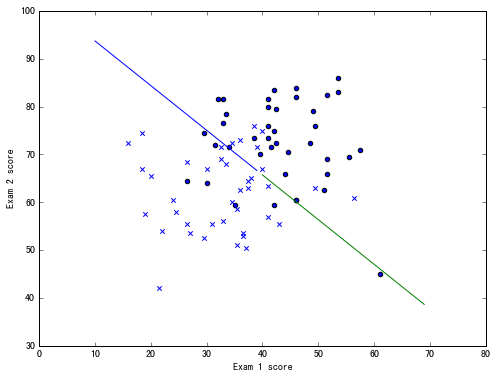

In [6]:
# 打印参数。牛顿法和梯度下降法的参数不同，因为梯度下降法对特征进行了归一化处理
print('thetas of gradient descnet:', thetas_gd)
print('thetas of newton`s method: ', thetas_nt)

# 测试用例。可以发现虽然参数不同，但牛顿法和梯度下降法最终的结果是一致的
new_test = np.array([[20, 80]])
new_test_scale = (new_test - x_mean) / x_std
new_test_scale = np.append(np.ones((len(new_test_scale), 1)), new_test_scale, 1)
new_test = np.append(np.ones((len(new_test), 1)), new_test, 1)

print('test result of gradient descent:', 1 - sigmoid((np.matrix(thetas_gd) * np.matrix(new_test_scale).T).item(0, 0)))
print('test result of newton`s method: ', 1 - sigmoid((np.matrix(thetas_nt) * np.matrix(new_test).T).item(0, 0)))

# 绘制分割线 牛顿法和梯度下降法的线基本是重合的，这里各画一半
plt.figure(1, figsize=(8, 6))
for k in range(len(x_arr)):
    if y_arr[k] > 0:
        plt.scatter(x_arr[k][1], x_arr[k][2])
    else:
        plt.scatter(x_arr[k][1], x_arr[k][2], marker='x')

# 牛顿法的结果
x1_nt = list(range(10, 40))
x2_nt = [-1.0 * (thetas_nt[0] + thetas_nt[1] * k) / thetas_nt[2] for k in x1_nt]
plt.plot(x1_nt, x2_nt)

# 梯度下降的结果，注意对归一化的值进行反处理
x1_gd = list(range(40, 70))
x2_gd = -1.0 * (thetas_gd[0] + thetas_gd[1] * ((np.array(x1_gd) - x_mean[0]) / x_std[0])) / thetas_gd[2]
x2_gd = np.array(x2_gd) * x_std[1]+ x_mean[1]
plt.plot(x1_gd, x2_gd)

plt.xlabel('Exam 1 score', fontsize='medium'); plt.ylabel('Exam 2 score', fontsize='medium')
plt.show()

## 二分类与多分类

- 多分类可以通过转化为one vs rest 的二分类
- 递归rest从而实现多分类

## 参考资料

- julyedu机器学习班
- 机器学习 周志华
- 吴恩达老师机器学习视频
